## GRIP TASK 6:Prediction using Decision Tree Algorithm

##### OBJECTIVES: 
    - Considering 'Iris' Dataset, Create the Decision Tree classifier and visualize it graphically
    - If we feed any new data to this classifier, it would be able to predict the right class accordingly. 

#### Loading libraries

In [4]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import sklearn.datasets as dataset
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#### Exploring the data

In [5]:
# Loading the iris dataset
iris=dataset.load_iris()


df =pd.read_csv('iris.csv')
x=df.drop(columns=['Species'])
y=iris.target

In [50]:
#Deleting Id column
df.drop('Id',axis=1,inplace=True)

In [51]:
x.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
x.tail(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [9]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


### Checking Missing Values

In [34]:
x.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
dtype: int64

### Describing the Data

In [33]:
x.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Text(0.5, 1.0, 'General Statistics of Iris Dataset')

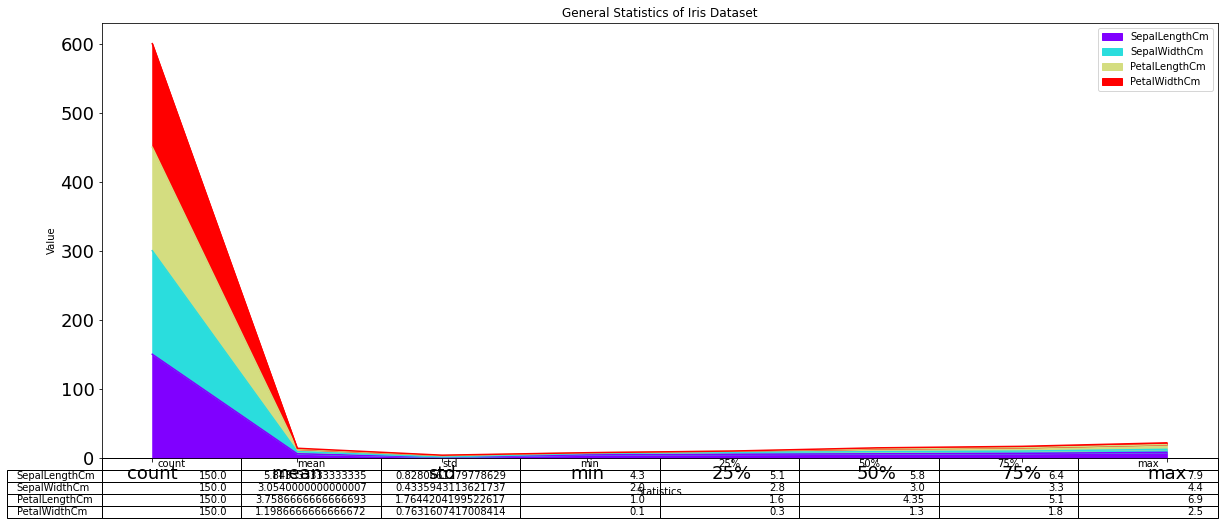

In [32]:
x.describe().plot(kind='area', fontsize=18, figsize=(20,8), table=True, colormap='rainbow')
plt.xlabel('Statistics' ,)
plt.ylabel('Value')
plt.title('General Statistics of Iris Dataset')

#### Above plot gives us a General Idea about the dataset.

### MODEL BUILDING: Defining the Decision Tree Algorithm/Train-Test-Split

In [14]:

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2)

model = DecisionTreeClassifier()
model.fit(X_train,Y_train)
predictions = model.predict(X_test)
score = accuracy_score(Y_test, predictions)
score

1.0

### Let us visualize the Decision Tree to understand it better.

In [15]:
text_rep = tree.export_text(model)
print(text_rep)

|--- feature_2 <= 2.60
|   |--- class: 0
|--- feature_2 >  2.60
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- class: 2
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- feature_0 <= 6.95
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_0 >  6.95
|   |   |   |   |   |--- class: 2
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.00
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  3.00
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2



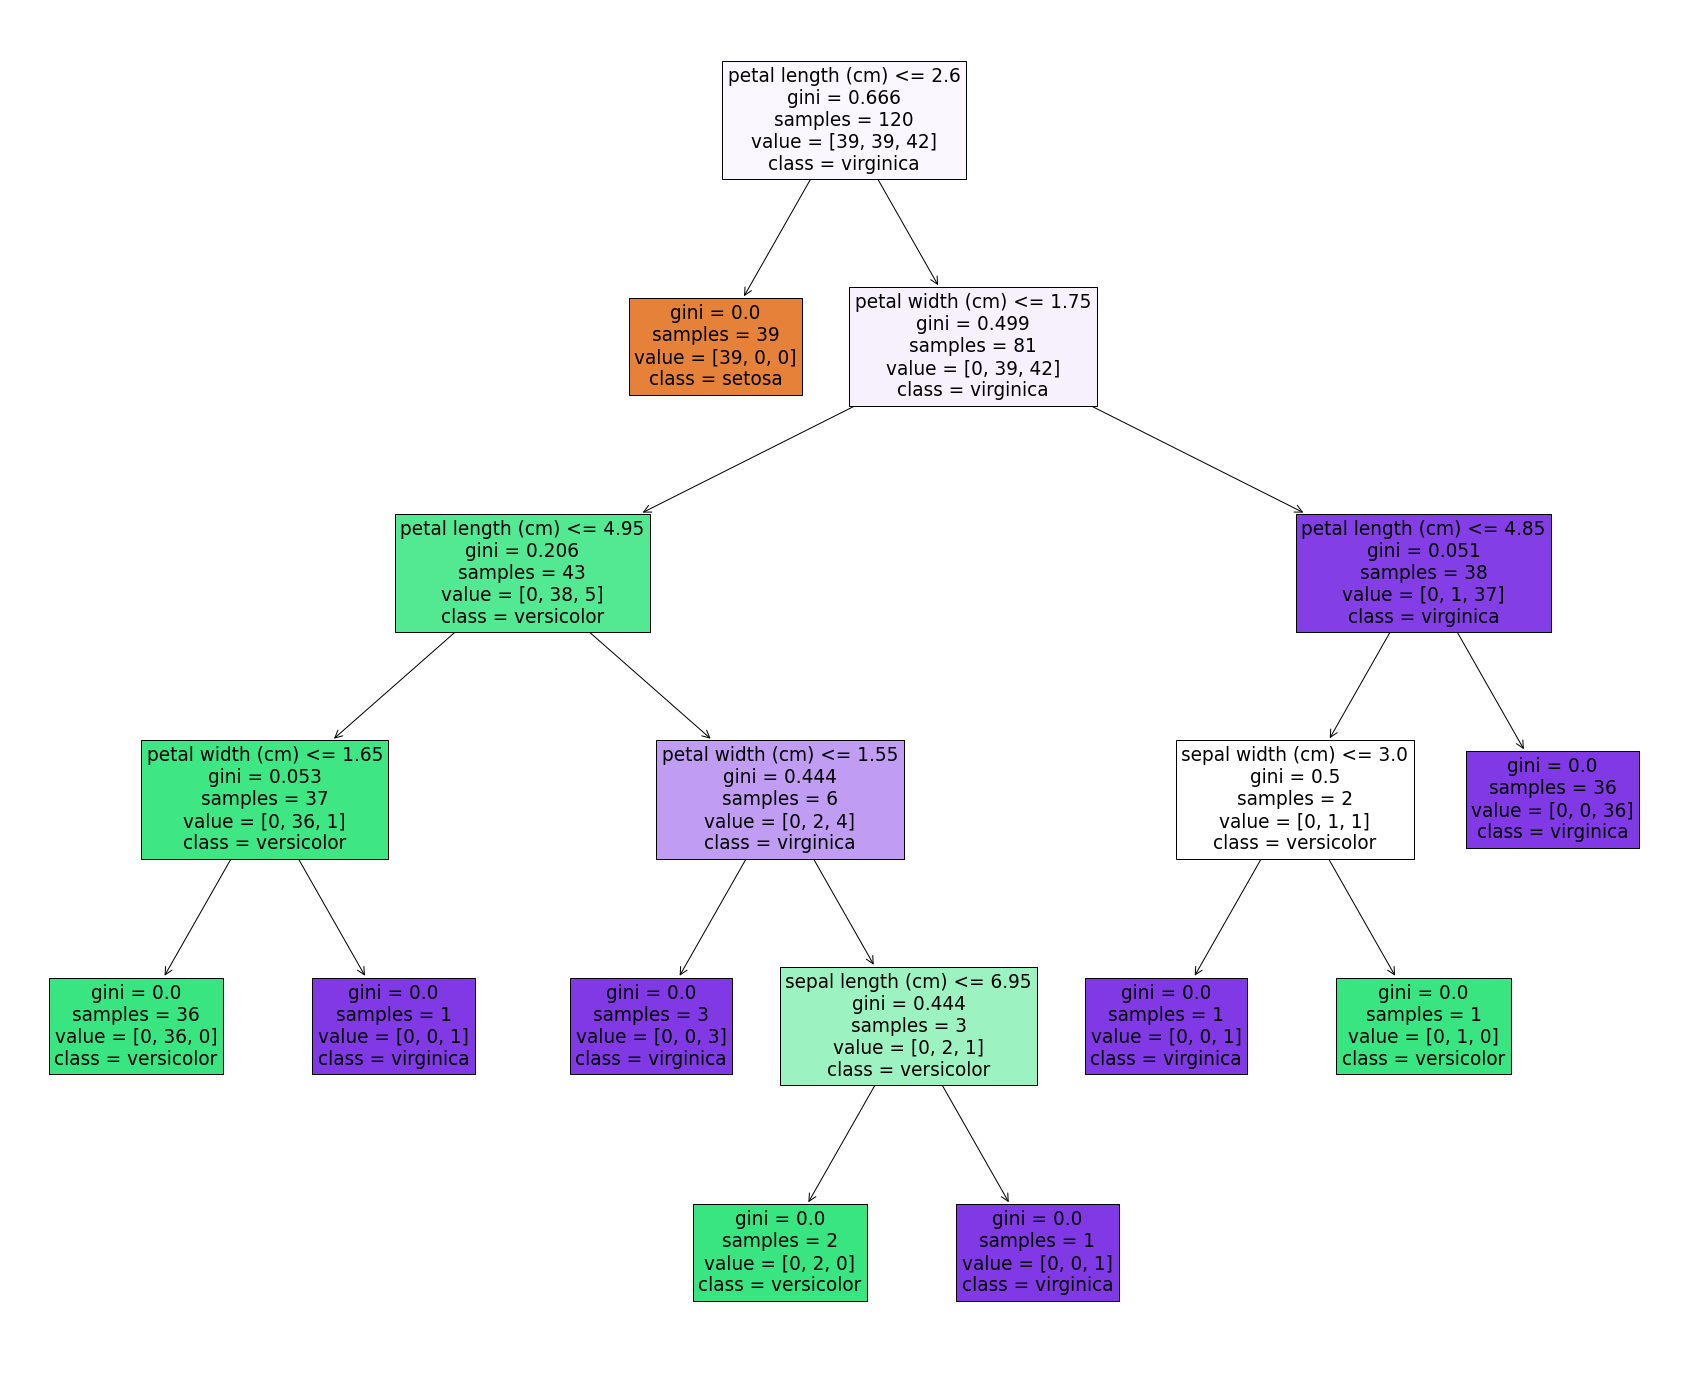

In [16]:
fig = plt.figure(figsize=(30,25))
_ = tree.plot_tree(model, feature_names = iris.feature_names, class_names=iris.target_names, filled=True)

In [17]:
# Saving Decision tree to log file
with open('Decisoin_tree.log', 'w') as fout:
    fout.write(text_rep)

# Visualization of the Iris Dataset

## Bar Plot : 
- The frequency of the observation is plotted.
- Plotting the frequency of the three species in the Iris Dataset

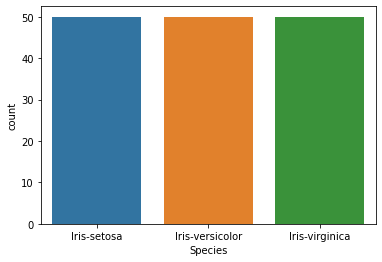

In [39]:
sns.countplot('Species', data=df)
plt.show()

## Pie Plot

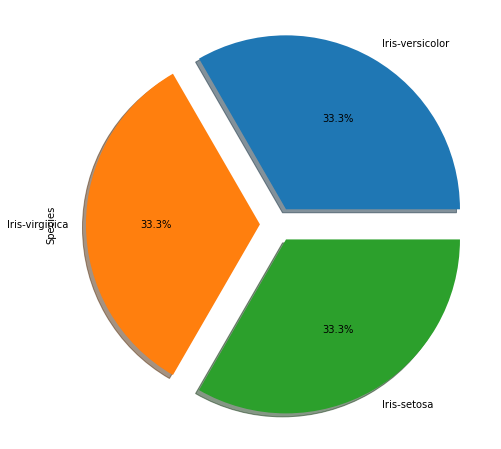

In [41]:
df['Species'].value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%1.1f%%',shadow=True,figsize=(10,8))
plt.show()

We can see that there are 50 samples each of all the Iris Species in the data set.

## Joint Plot

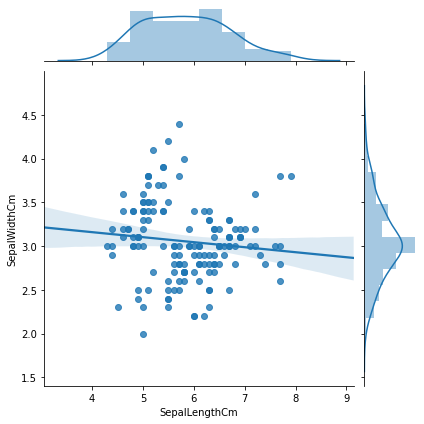

In [43]:
sns.jointplot("SepalLengthCm", "SepalWidthCm", data=x, kind="reg")

## Using Box Plot

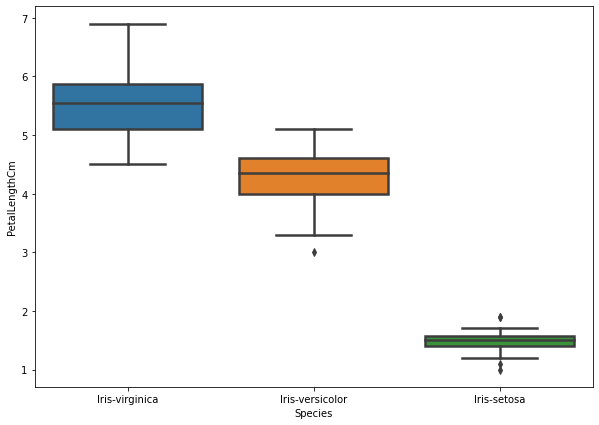

In [44]:
fig=plt.gcf()
fig.set_size_inches(10,7)
fig=sns.boxplot(x='Species',y='PetalLengthCm',data=df,order=['Iris-virginica','Iris-versicolor','Iris-setosa'],linewidth=2.5,orient='v',dodge=False)

## Violin Plot

<AxesSubplot:xlabel='Species', ylabel='SepalWidthCm'>

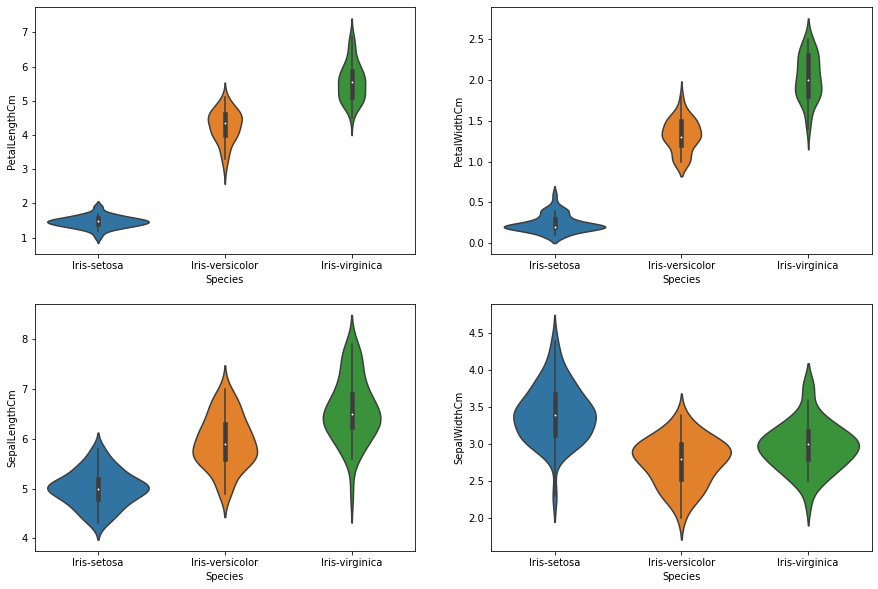

In [45]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=df)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=df)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=df)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=df)

## Pair Plot

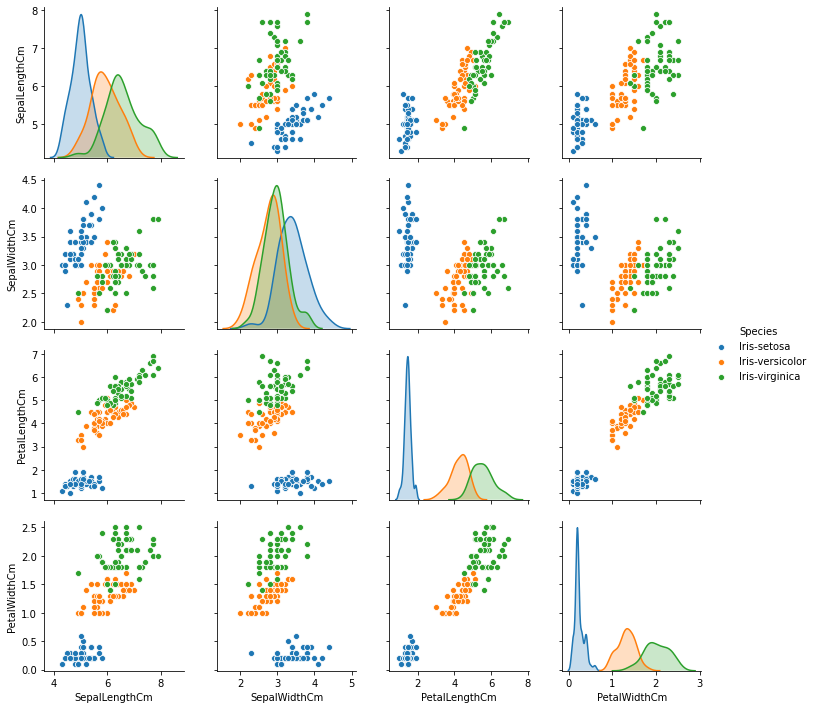

In [52]:
sns.pairplot(df,hue='Species');

## Dashborad

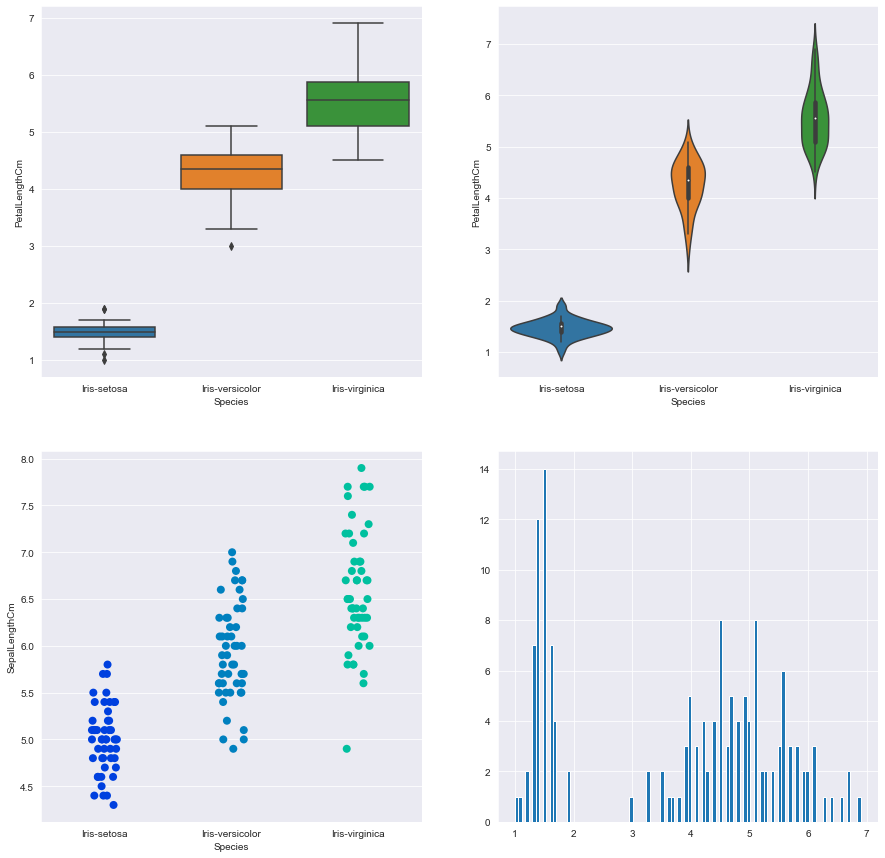

In [57]:
sns.set_style('darkgrid')
f,axes=plt.subplots(2,2,figsize=(15,15))

A1=sns.boxplot(x="Species", y="PetalLengthCm", data=df,ax=axes[0,0])
A2=sns.violinplot(x='Species',y='PetalLengthCm', data=df,ax=axes[0,1])
A3=sns.stripplot(x='Species',y='SepalLengthCm',data=df, jitter=True,edgecolor='gray',size=8,palette='winter',orient='v',ax=axes[1,0])
axes[1,1].hist(df.PetalLengthCm,bins=100)
plt.show()

#### You can now feed any new/test data to this classifer and it would be able to predict the right class accordingly.

# THANK YOU